Credit: https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system

In [2]:
import io
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:

# # Uncomment this to load the csv files
# # Do not push csv files to GitHub (files too large)
# import kaggle

# kaggle.api.authenticate()

# kaggle.api.dataset_download_files('rounakbanik/the-movies-dataset', path='./movies', unzip=True)


In [4]:
"""
# Alternative Way
import kagglehub


kagglehub.login()

kagglehub.dataset_download('rounakbanik/the-movies-dataset')
"""

"\n# Alternative Way\nimport kagglehub\n\n\nkagglehub.login()\n\nkagglehub.dataset_download('rounakbanik/the-movies-dataset')\n"

In [5]:
csv_files = []

for root, dirs, files in os.walk('movies'):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))
            
print(csv_files)

['movies\\credits.csv', 'movies\\keywords.csv', 'movies\\links.csv', 'movies\\links_small.csv', 'movies\\movies_metadata.csv', 'movies\\ratings.csv', 'movies\\ratings_small.csv']


In [6]:
dataframes = {}
for file_path in csv_files:
    key = os.path.basename(file_path[:-4])
    dataframes[key] = pd.read_csv(file_path)
    

C:\Users\brigh\AppData\Local\Temp\ipykernel_7996\1018815022.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[key] = pd.read_csv(file_path)


### EDA

In [7]:
credits_df = pd.read_csv('movies/credits.csv')

In [8]:
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [9]:
movies_metadata_df = pd.read_csv('movies/movies_metadata.csv')

C:\Users\brigh\AppData\Local\Temp\ipykernel_7996\1820767806.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata_df = pd.read_csv('movies/movies_metadata.csv')


In [10]:
movies_metadata_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [11]:
movies_metadata_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


### Trending Movies Recommendation

In [12]:
movies_metadata_df['popularity'].isnull().sum()

np.int64(5)

In [13]:
movies_metadata_df[movies_metadata_df['popularity'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19729,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,82663,tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29502,False,"{'id': 122661, 'name': 'Mardock Scramble Colle...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",http://m-scramble.jp/exhaust/,122662,tt2423504,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35586,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",NaN,249260,tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


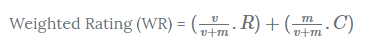

where

- v is the number of votes for the movie
- m is the minimum votes required to be listed in the chart
- R is the average rating of the movie
- C is the mean vote across the whole report

In [14]:
c = movies_metadata_df['vote_average'].mean()
print(c)

5.618207215134185


In [15]:
m = movies_metadata_df['vote_count'].quantile(0.9)
print(m)

160.0


In [16]:
q_movies = movies_metadata_df[movies_metadata_df['vote_count'] >= m]

In [17]:
def weighted_rating(x, m=m, c=c):
    v = x['vote_count']
    R = x['vote_average']
    return (v / (v + m) * c + (m / (v + m) * c))

In [18]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

C:\Users\brigh\AppData\Local\Temp\ipykernel_7996\3735737523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_movies['score'] = q_movies.apply(weighted_rating, axis=1)


### TOP 10 High Score Movies in this dataset

In [19]:
trending_movies = q_movies.sort_values('score', ascending=False)

In [20]:
trending_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
42236,Justice League Dark,171.0,7.0,5.618207
1910,Seven Samurai,892.0,8.2,5.618207
45258,Descendants 2,171.0,7.5,5.618207
1911,Dangerous Liaisons,267.0,7.1,5.618207
1987,Sleeping Beauty,1332.0,6.8,5.618207
5805,Maid in Manhattan,493.0,5.6,5.618207
6651,Cobra,402.0,5.6,5.618207
1204,La Femme Nikita,511.0,7.0,5.618207
7000,The Lord of the Rings: The Return of the King,8226.0,8.1,5.618207
2806,Hang 'em High,197.0,6.7,5.618207


#### Plot the trending

In [21]:
import matplotlib.pyplot as plt

In [22]:
movies_metadata_df[movies_metadata_df['popularity'].isna()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19729,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,82663,tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29502,False,"{'id': 122661, 'name': 'Mardock Scramble Colle...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",http://m-scramble.jp/exhaust/,122662,tt2423504,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35586,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",NaN,249260,tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
pop = movies_metadata_df

In [24]:
"""
TODO: change popularity datatype from 'object' to 'float'.
"""
pop['popularity'] = pop['popularity'].dropna()

In [51]:
pop.loc[pop['popularity'] == 'Beware Of Frost Bites']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
pop = pop.drop(index=35587)

In [55]:
pop.iloc[35587]

adult                                                                False
belongs_to_collection                                                  NaN
budget                                                                   0
genres                   [{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...
homepage                                                               NaN
id                                                                  151911
imdb_id                                                          tt0029924
original_language                                                       en
original_title                                                    Blockade
overview                 A simple peasant is forced to take up arms to ...
popularity                                                         0.69411
poster_path                               /cYolP5lEMCCMpXMTAbuf07Il3sT.jpg
production_companies     [{'name': 'United Artists', 'id': 60}, {'name'...
production_countries     

In [57]:
pop['popularity'] = pop['popularity'].astype('float')

In [63]:
pop.sort_values('popularity', ascending=False).head(10)[['title', 'genres', 'popularity']]

,title,genres,popularity
30700,Minions,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",547.488298
33356,Wonder Woman,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",294.337037
42222,Beauty and the Beast,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",287.253654
43644,Baby Driver,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",228.032744
24455,Big Hero 6,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",213.849907
26564,Deadpool,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",187.860492
26566,Guardians of the Galaxy Vol. 2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",185.330992
14551,Avatar,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",185.070892
24351,John Wick,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",183.870374
23675,Gone Girl,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",154.801009


## Content Based Filtering

In [26]:
movies_metadata_df['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

Below required Term Frequency-Inverse Document Frequency (TF-IDF) knowledge

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
# Remove all english stop words e.g. 'the', 'a', 'an'
tfidf = TfidfVectorizer(stop_words='english')

movies_metadata_df['overview'] = movies_metadata_df['overview'].fillna('')

# Construct the Required TF-IDF matrix by fitting & Tranforming the data
tfidf_matrix = tfidf.fit_transform(movies_metadata_df['overview'])

In [29]:
tfidf_matrix.shape
# 45466 Movies have 76k different words

(45466, 75827)

# Cosine Similiarity